<a href="https://colab.research.google.com/github/taxfree-python/iGEM_2022_Dry-Prediction/blob/main/Sri_Lanka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install prophet
from prophet import Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
# !pip list

In [ ]:
data = pd.read_csv('drive/MyDrive/dry/modeling/data/Sri_Lanka/csv/monthly.csv')
data['year'] = pd.to_datetime(data['year'].astype(str) + '-' + data['month'].astype(str), format = '%y-%m')
data = data.drop('month', axis = 1)
data

,year,infected
0,2010-01-01,4805
1,2010-02-01,4731
2,2010-03-01,2528
3,2010-04-01,2004
4,2010-05-01,1950
...,...,...
145,2022-02-01,2768
146,2022-03-01,2334
147,2022-04-01,3633
148,2022-05-01,4513


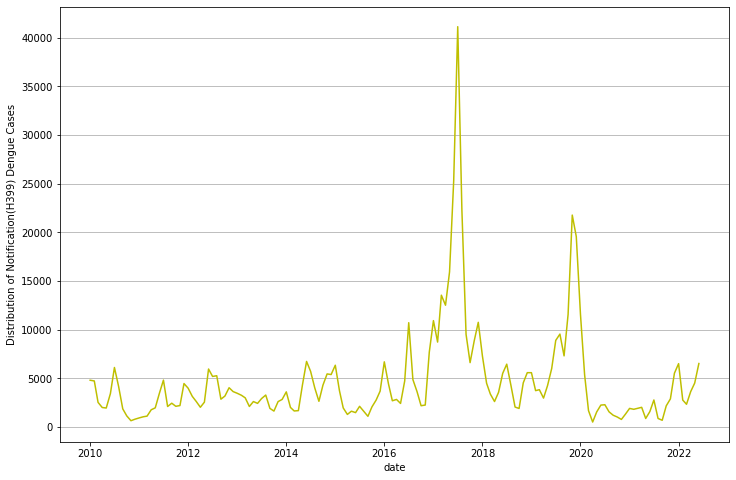

In [ ]:
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(data['year'], data['infected'], color = 'y')
ax.set_xlabel('date')
ax.set_ylabel('Distribution of Notification(H399) Dengue Cases')
ax.grid(axis = 'y')

# plt.savefig("fig_data_dropped.png")
# files.download("fig_data_dropped.png")

In [ ]:
rename_mappings = {'year' : 'ds', 'infected' : 'y'}
data.rename(columns = rename_mappings, inplace = True)

In [ ]:
data

,ds,y
0,2010-01-01,4805
1,2010-02-01,4731
2,2010-03-01,2528
3,2010-04-01,2004
4,2010-05-01,1950
...,...,...
144,2022-02-01,2768
145,2022-03-01,2334
146,2022-04-01,3633
147,2022-05-01,4513


In [ ]:
train_data, eval_data = train_test_split(data, shuffle = False, test_size = 0.25)

In [ ]:
eval_data

,ds,y
111,2019-05-01,4260
112,2019-06-01,6019
113,2019-07-01,8897
114,2019-08-01,9546
115,2019-09-01,7307
116,2019-10-01,11573
117,2019-11-01,21769
118,2019-12-01,19560
119,2020-01-01,11608
120,2020-02-01,5368


In [ ]:
m = Prophet()
m.fit(train_data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvhru7xr/qg0ciiph.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkvhru7xr/6_nc8nfm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51016', 'data', 'file=/tmp/tmpkvhru7xr/qg0ciiph.json', 'init=/tmp/tmpkvhru7xr/6_nc8nfm.json', 'output', 'file=/tmp/tmp3ajwxxrq/prophet_model-20220821173044.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:30:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:30:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = m.predict(eval_data.drop(['y'], axis = 1))

In [ ]:
mae = mean_absolute_error(forecast['yhat'], eval_data['y'])
print(f'MAE: {mae: .05f}')

MAE:  6299.77309


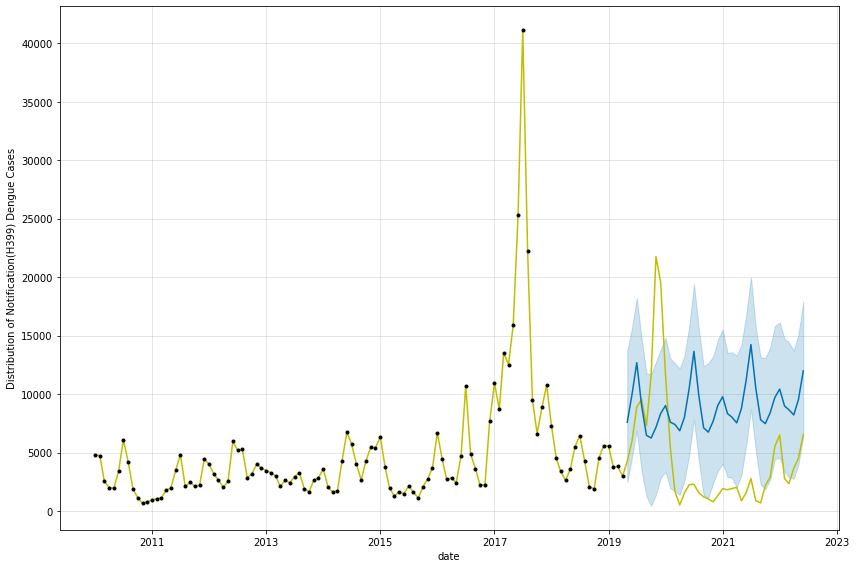

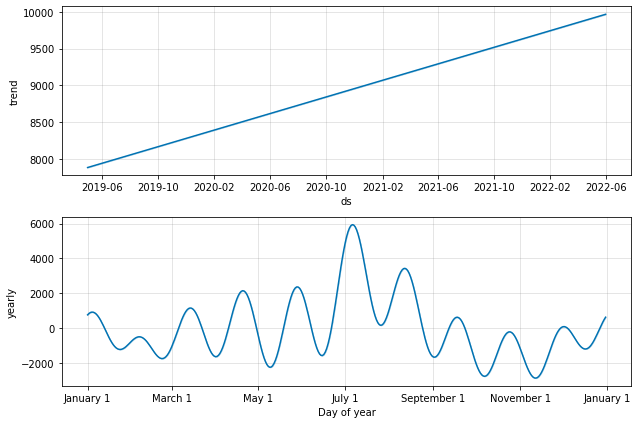

In [ ]:
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(data['ds'], data['y'], color = 'y')
m.plot(forecast, ax = ax)
# plt.savefig("fig_res.png")
# files.download("fig_res.png")
m.plot_components(forecast)
ax.set_xlabel('date')
ax.set_ylabel('Distribution of Notification(H399) Dengue Cases')

plt.show()